# 📚 Machine Learning Assignment
**Name:** AMULURU VENKATA SIVA SAI

## Tasks:
- Download UCI datasets
- Apply Linear Regression & Logistic Regression
- Try normalization
- Generate accuracy graphs

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing, load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, classification_report

In [2]:
# Load California Housing
housing = fetch_california_housing()
X_housing = pd.DataFrame(housing.data, columns=housing.feature_names)
y_housing = housing.target

# Load Breast Cancer
cancer = load_breast_cancer()
X_cancer = pd.DataFrame(cancer.data, columns=cancer.feature_names)
y_cancer = cancer.target

In [3]:
# Normalization
scaler_housing = MinMaxScaler()
X_housing_scaled = scaler_housing.fit_transform(X_housing)

scaler_cancer = StandardScaler()
X_cancer_scaled = scaler_cancer.fit_transform(X_cancer)

In [4]:
# Linear Regression on California Housing
X_train_h, X_test_h, y_train_h, y_test_h = train_test_split(X_housing_scaled, y_housing, test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(X_train_h, y_train_h)
y_pred_h = lr.predict(X_test_h)

mse = mean_squared_error(y_test_h, y_pred_h)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_h, y_pred_h)

print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")

MSE: 0.56
RMSE: 0.75
R²: 0.58


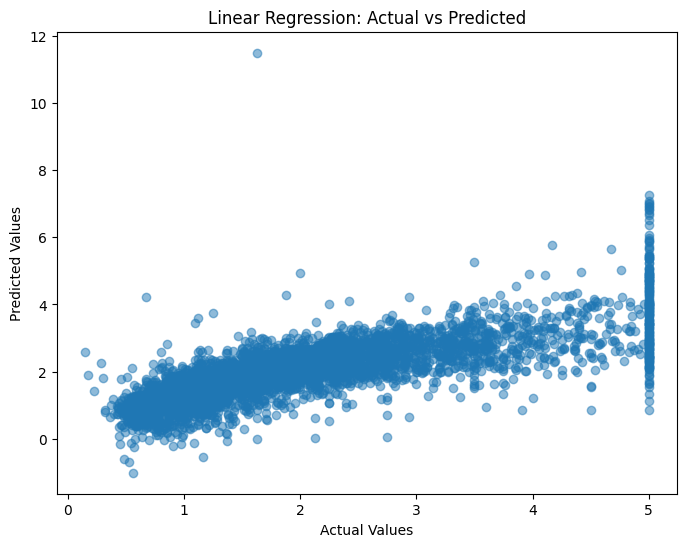

In [5]:
plt.figure(figsize=(8,6))
plt.scatter(y_test_h, y_pred_h, alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Linear Regression: Actual vs Predicted")
plt.show()

In [6]:
# Logistic Regression on Breast Cancer
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_cancer_scaled, y_cancer, test_size=0.2, random_state=42)

logreg = LogisticRegression(max_iter=10000)
logreg.fit(X_train_c, y_train_c)
y_pred_c = logreg.predict(X_test_c)

acc = accuracy_score(y_test_c, y_pred_c)
cm = confusion_matrix(y_test_c, y_pred_c)

print(f"Accuracy: {acc:.2f}")
print("\nClassification Report:\n", classification_report(y_test_c, y_pred_c))

Accuracy: 0.97

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



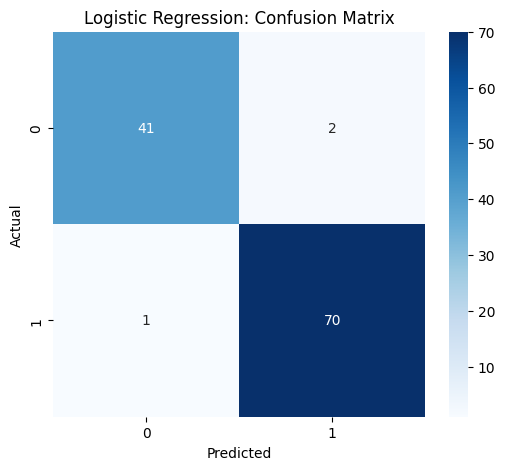

In [7]:
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Logistic Regression: Confusion Matrix")
plt.show()

In [8]:
# RobustScaler Comparison
scaler_robust = RobustScaler()
X_cancer_robust = scaler_robust.fit_transform(X_cancer)

X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_cancer_robust, y_cancer, test_size=0.2, random_state=42)

logreg_r = LogisticRegression(max_iter=10000)
logreg_r.fit(X_train_r, y_train_r)
y_pred_r = logreg_r.predict(X_test_r)

acc_r = accuracy_score(y_test_r, y_pred_r)
print(f"Accuracy with RobustScaler: {acc_r:.2f}")

Accuracy with RobustScaler: 0.99


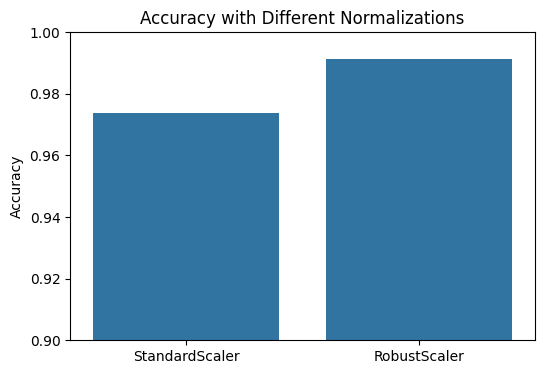

In [9]:
methods = ['StandardScaler', 'RobustScaler']
accuracies = [acc, acc_r]

plt.figure(figsize=(6,4))
sns.barplot(x=methods, y=accuracies)
plt.ylabel("Accuracy")
plt.title("Accuracy with Different Normalizations")
plt.ylim(0.9, 1)
plt.show()

## ✅ Conclusion
- Successfully applied Linear and Logistic Regression using scikit-learn.
- Explored normalization effects on accuracy.
- Visualized results for clarity.